Imaginons une entreprise qui souhaite prédire la résiliation des contrats par ses clients, soit un cas de classification binaire : le client restera-t-il ou non ? L'analyse permettra de cibler les clients qui risquent de partir, et de leur proposer de nouvelles offres personnalisées afin de les fidéliser et d'éviter leur départ. 

In [28]:
# On commence par l'importation des packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Chargement du dataset Customer, qui regroupe des données sur les clients de l'entreprise
df = pd.read_csv("Customer.csv")

#Aperçu du dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes


In [8]:
# Les infos principales nous informent de l'absence de Nan et des variables à encoder pour la suite (object) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7043 non-null   object 
 9   Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [10]:
#Suppression de la variable CustomerID qui ne servira pas pour le modèle
df = df.drop(['customerID'], axis=1)

In [48]:
#La variable TotalCharges était de type object en raison de valeurs ' ' 
# On supprime donc ces entrées avant de changer le type de la variable en float
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [12]:
# Séparation du jeu de données entre : 
#'feats' : nos valeurs explicatives 
# 'target' : notre variable cible, qui détermine si le client a résilié ou non 
feats = df.drop('Churn', axis=1)
target = df.Churn

In [13]:
# On sépare le dataset entre un jeu d'entraînement (X_train,y_train) et un jeu de test (X_test, y_test) 
# La partie test contient 25% du jeu de données initial

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25, random_state=42)

In [14]:
#Standardisation des jeux d'entrainement pour rendre les données comparables puis application des paramètres sur le jeu d'entraînement 
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [21]:
# Encodage de la variable cible, le but est que le oui devienne 1 et le non devienne 0
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

In [16]:
# On réitère l'opération pour nos variables explicatives 
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

X_train.loc[:,cat] = oneh.fit_transform(X_train[cat])

X_test.loc[:,cat] = oneh.transform(X_test[cat])

C:\Users\frede\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\frede\AppData\Local\Temp\ipykernel_10232\3698423473.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:,cat] = oneh.fit_transform(X_train[cat])
C:\Users\frede\AppData\Local\Temp\ipykernel_10232\3698423473.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newva

In [49]:
# Nos données sont prêtes pour la modélisation, les modèles implémentés seront évalués par 4 métriques : score, rappel, f1-score et la précision
# On commence avec la régression logistique, spécifiquement prévue pour les cas de variable cible binaire (0 / 1)


model = LogisticRegression() 

model.fit(X_train, y_train) 

y_pred = model.predict(X_test) 

model.score(X_test, y_test)

print('Score sur ensemble train :', model.score(X_train, y_train))

print('Score sur ensemble test :', model.score(X_test, y_test))

Score sur ensemble train : 0.7959802806219188
Score sur ensemble test : 0.7872582480091013


In [20]:
# Voyons ce que donne l'évaluation de notre modèle
y_pred = model.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))


print(classification_report(y_test, y_pred, ))
#On note une moindre performance sur la classe 1 

Prédiction,0,1
Realité,,
0,1172,128
1,246,212


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.62      0.46      0.53       458

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.77      0.79      0.78      1758



In [25]:
#Essayons maintenant un modèle d'arbre de décision 
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Score sur ensemble train', clf.score(X_train, y_train))
print('Score sur ensemble test', clf.score(X_test, y_test))

Score sur ensemble train 0.9973454683352294
Score sur ensemble test 0.7093287827076223


In [27]:
#Evaluons ce nouveau modèle 

y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,0,1
Realité,,
0,1032,268
1,243,215


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1300
           1       0.45      0.47      0.46       458

    accuracy                           0.71      1758
   macro avg       0.63      0.63      0.63      1758
weighted avg       0.71      0.71      0.71      1758



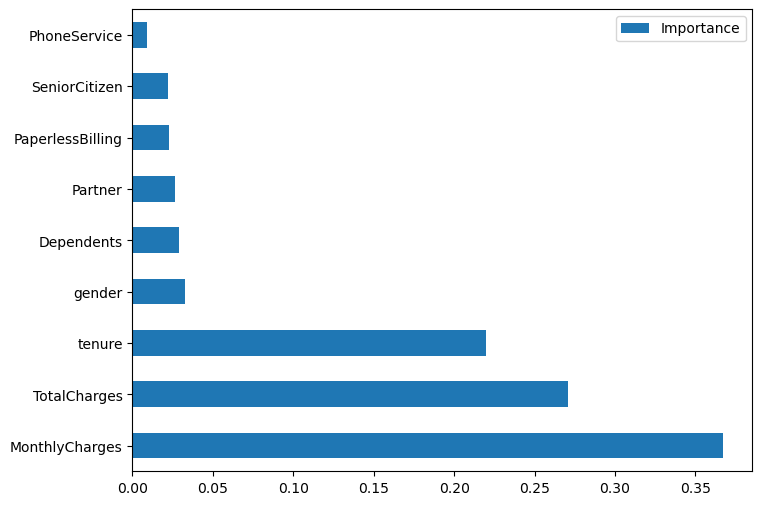

In [29]:
#Essayons de faire ressortir les variables les plus influentes de notre modèle
feat_importances = pd.DataFrame(clf.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6));

In [35]:
#Il s'agit là de relancer notre arbre de décision en sélectionnant les 3 variables les plus importantes
X_train_new = X_train[['MonthlyCharges','TotalCharges','tenure']]
X_test_new = X_test[['MonthlyCharges','TotalCharges','tenure']]

clf = tree.DecisionTreeClassifier(random_state=42) 
  
clf.fit(X_train_new, y_train)

print(clf.score(X_train_new,y_train))
print(clf.score(X_test_new,y_test))


0.9897610921501706
0.7167235494880546


In [36]:

y_pred = clf.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))
#On constate que la réduction de dimension n'impacte que très peu la performance de notre modèle 

Prédiction,0,1
Realité,,
0,1046,254
1,244,214


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1300
           1       0.46      0.47      0.46       458

    accuracy                           0.72      1758
   macro avg       0.63      0.64      0.63      1758
weighted avg       0.72      0.72      0.72      1758



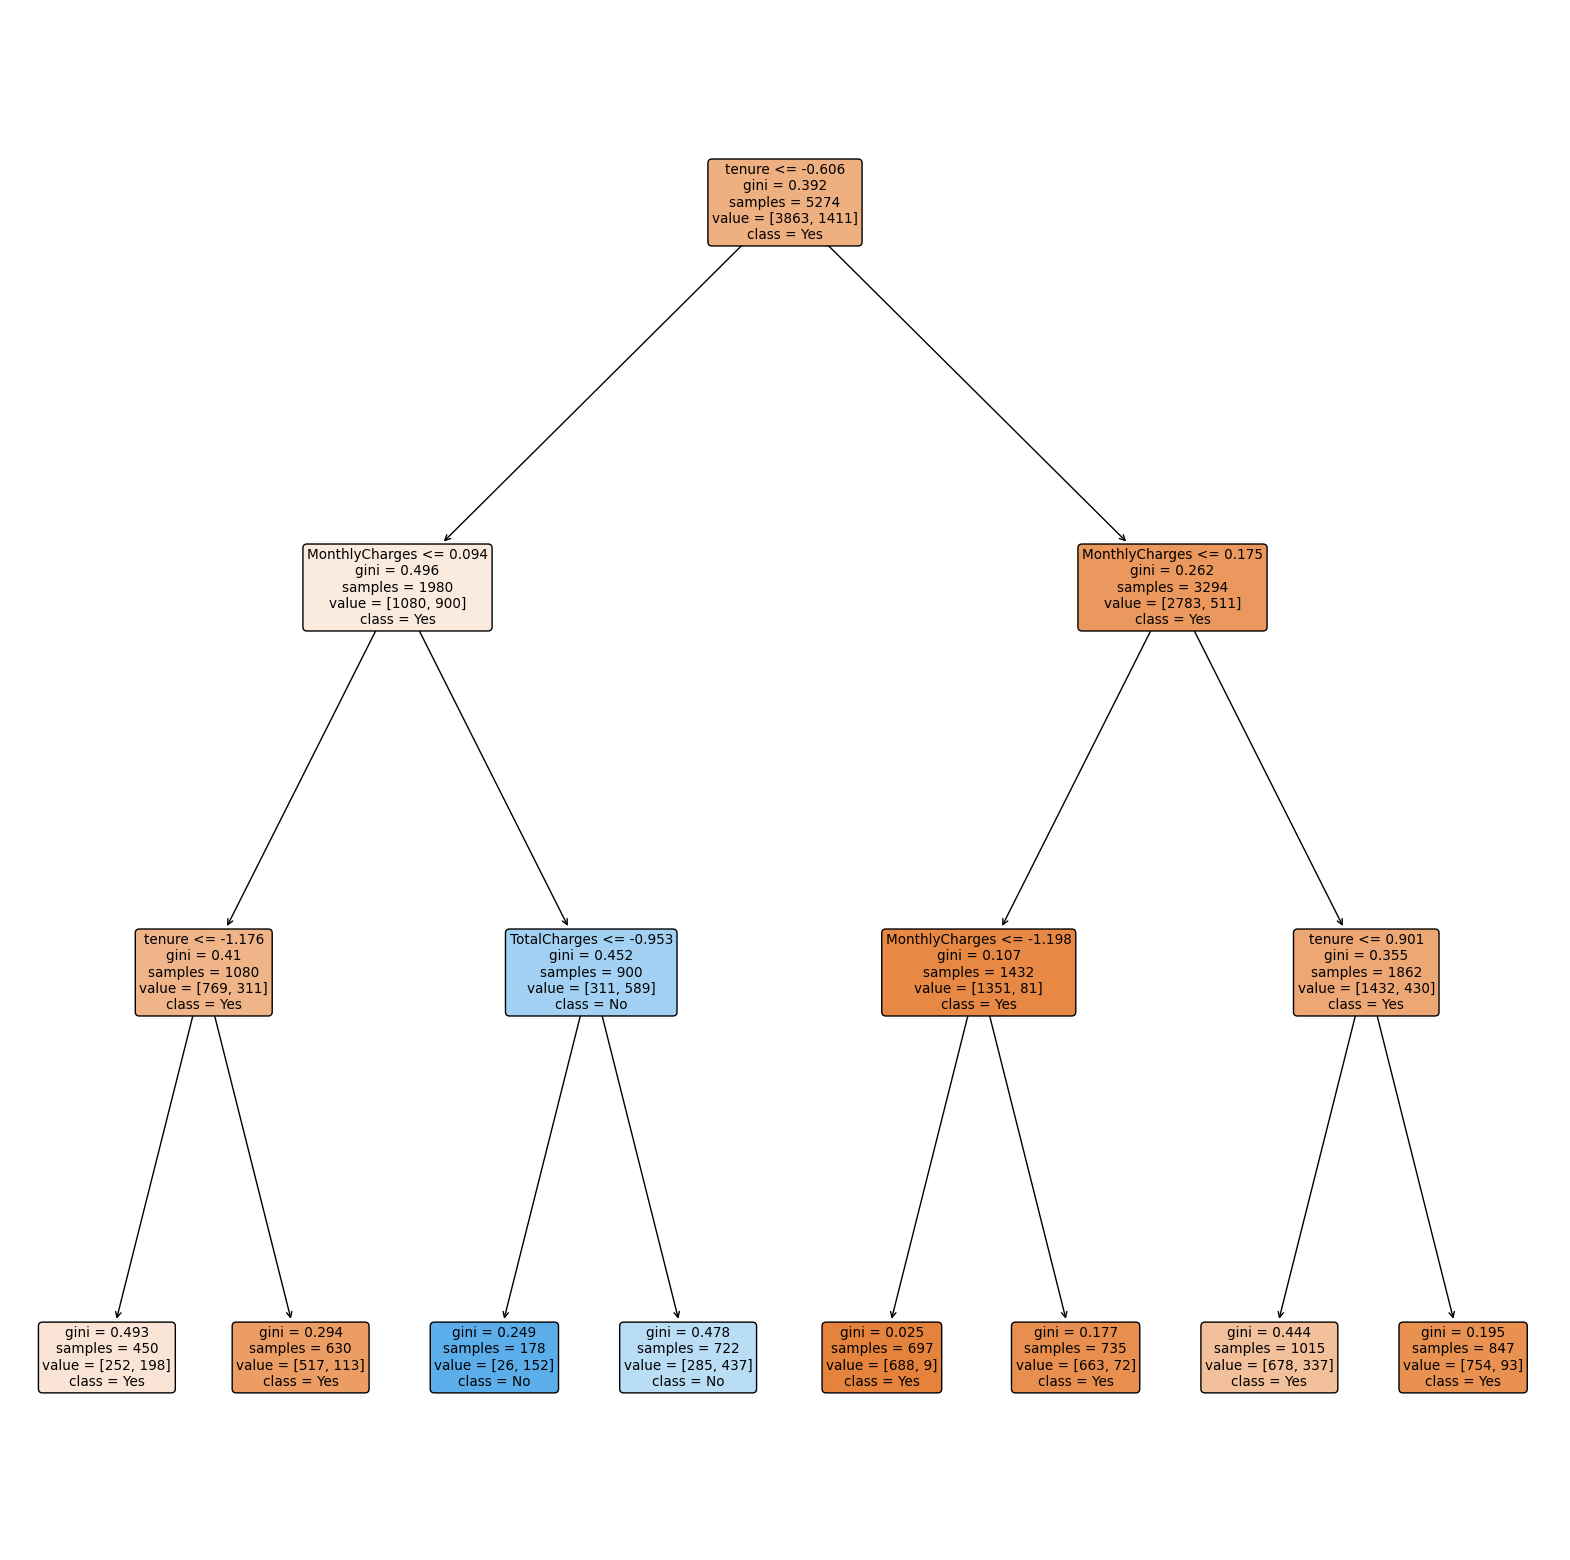

In [50]:
#La réduction de dimension nous permet néanmoins d'afficher un arbre de décision plus lisible, lançons la visualisation

clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 

clf.fit(X_train_new, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['MonthlyCharges','TotalCharges','tenure','gender'],
          class_names = ['Yes','No'],
          filled = True, 
          rounded = True)

plt.show()

In [51]:
# Nouvelle tentative avec un random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score sur ensemble train', rf.score(X_train, y_train))
print('Score sur ensemble test', rf.score(X_test, y_test))

Score sur ensemble train 0.9973454683352294
Score sur ensemble test 0.7707622298065984


In [42]:
y_pred = rf.predict(X_test)

print(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))
#Les scores étant légèrement meilleurs, nous garderons ce modèle 

col_0     0    1
row_0           
0      1159  141
1       262  196
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1300
           1       0.58      0.43      0.49       458

    accuracy                           0.77      1758
   macro avg       0.70      0.66      0.67      1758
weighted avg       0.75      0.77      0.76      1758



In [43]:
#Observons la distribution en pourcentage de notre variable cible
target.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [52]:
# La répartition étant déséquilibrée, voyons si un resampling permet d'améliorer nos résultats
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts(normalize = True)))

Classes échantillon oversampled : {0: 0.5, 1: 0.5}


In [53]:
rf = RandomForestClassifier()
rf.fit(X_ro, y_ro)

print('Score sur ensemble train', rf.score(X_ro, y_ro))
print('Score sur ensemble test', rf.score(X_test, y_test))

from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)


display(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))


Score sur ensemble train 0.9980585037535594
Score sur ensemble test 0.7582480091012515


col_0,0,1
row_0,,
0,1102,198
1,227,231


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1300
           1       0.54      0.50      0.52       458

    accuracy                           0.76      1758
   macro avg       0.68      0.68      0.68      1758
weighted avg       0.75      0.76      0.76      1758



In [54]:
# Le rééquilibrage a fait son petit effet, les scores ont un peu grimpé ! 
# Si vous êtes arrivés jusque ici, merci de votre attention :)